* [1.Description des données](#dd)
* [2.Nettoyage](#ne)
* [3.Choix des variables cibles (les émissions de CO2 et  la consommation totale d’énergie)](#cv)
* [4.Analyse exploratoire](#ae)
* [5.Sauvegarde des données dans un fichier csv](#cs)

In [79]:
import pandas as pd
import numpy as np
import warnings
import missingno as msno
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt 
import folium
from folium import plugins
warnings.filterwarnings('ignore')

# 1.Description des données <a class="anchor" id="dd"></a>

In [80]:
df=pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [81]:
df.shape

(3376, 46)

In [82]:
df.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
0                    0659000030  ...      1.156514e+06         3946027.0   
1                    0659000220  ...      9.504252e+05         3242851.0   
2                    0659000475  ...      1.451544e+07        49526664.0   
3                    0659000640  ...      8.115253e+05         2768924.0   
4                    0659000970  ...      1.573449e+06         5368607.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
0         12764.52930         1276453.0        False       NaN   
1         51450.81641         5145082.0        False       NaN   
2         14938.00000         1493800.0        False       NaN   
3         18112.13086         1811213.0        False       NaN   
4         88039.98438         8803998.0        False       NaN   

   ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0         Compliant      NaN             249.98                   2.83  
1         Compliant      NaN             295.86                   2.86  
2         Compliant      NaN            2089.28                   2.19  
3         Compliant      NaN             286.43                   4.67  
4         Compliant      NaN             505.01                   2.88  

[5 rows x 46 columns]

In [83]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [84]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [85]:
#batiments non destinés à l'habitation
df = df[~df['BuildingType'].str.contains("Multifamily")]
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

<AxesSubplot:>

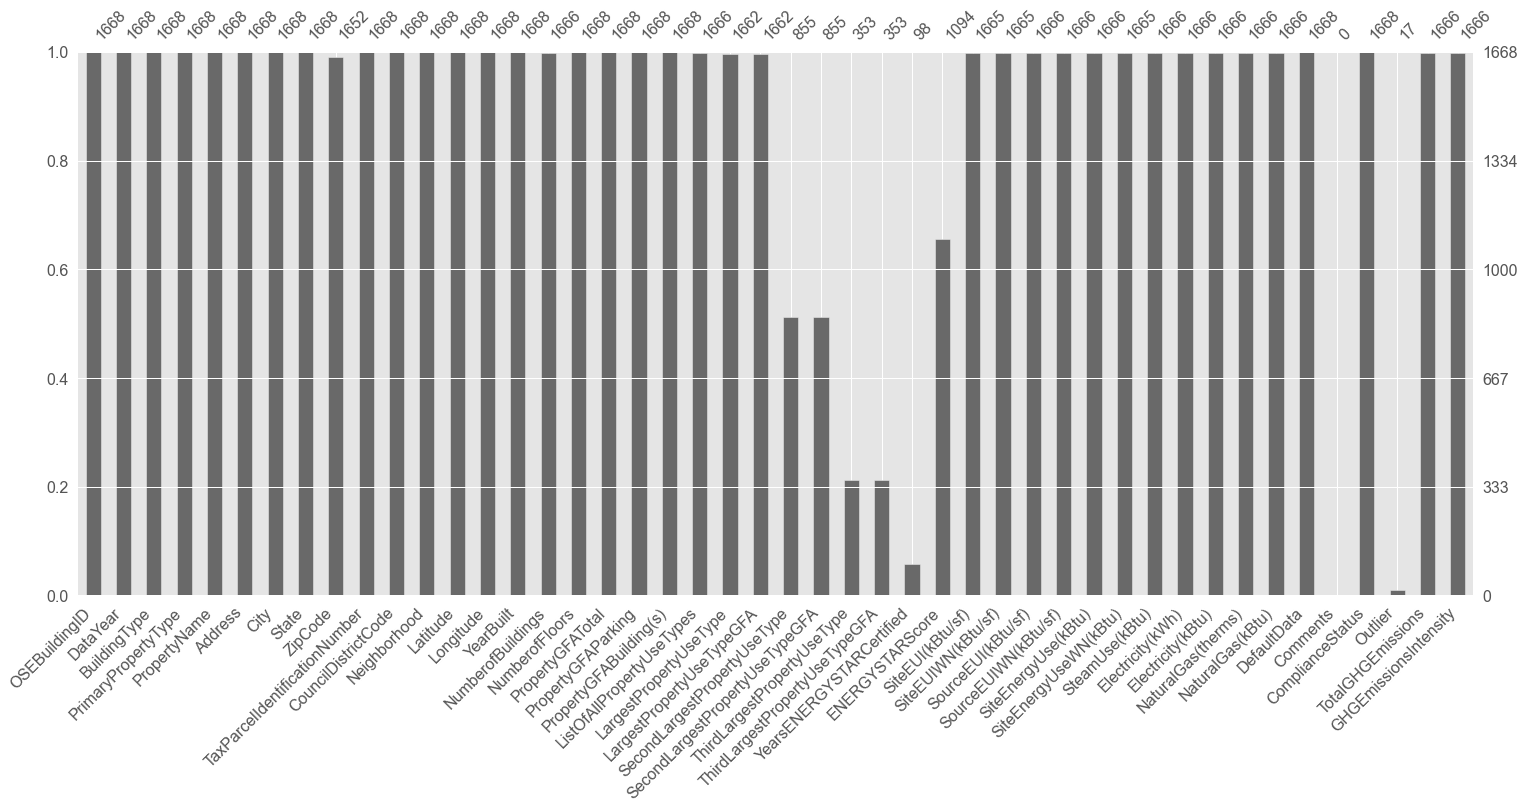

In [86]:
msno.bar(df)

In [87]:
#Vérification de l'emplacement
import folium
map = folium.Map()
map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()],zoom_start=10)
for i in range(0,len(df)):
    folium.Circle([df.iloc[i]['Latitude'],df.iloc[i]['Longitude']], 
                      popup=df.iloc[i]['Address'], radius =100).add_to(map)
map

**Observation**
<br>
Il s'agit bien des batiments dans Seattle

# 2.Choix des variables cibles (les émissions de CO2 et la consommation totale d’énergie)

In [88]:
target1='TotalGHGEmissions'
target2='SiteEnergyUse(kBtu)'

# 3.Nettoyage<a class="anchor" id="ne"></a>

In [89]:
df.shape

(1668, 46)

In [90]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

### Suppression de quelques variables

In [91]:
# suppressions des variables qui ne nous intéressent pas
df.drop(['State','ZipCode','City'], axis=1, inplace=True)#deja State et City ont chacun une seule valeur

In [92]:
df.shape

(1668, 43)

In [93]:
columns_to_drop = ['PropertyName', #similaire à ID
                   'TaxParcelIdentificationNumber', #similaire à ID
                   'ListOfAllPropertyUseTypes',
                   'ComplianceStatus',#le statut de conformité qui indique si une proprité satisfait les exigences en matière de benchmarking énergétique
                                      #pour l'année en cours n'est pas utile pour predire les emissions en co2 et la consommation d'energie 
                   'LargestPropertyUseType', 
                   'SecondLargestPropertyUseType', 
                   'ThirdLargestPropertyUseType',#la donnée la plus importante est  dans la colonne 'PrimaryPropertyType'
                   'LargestPropertyUseTypeGFA',
                   'SecondLargestPropertyUseTypeGFA',
                   'ThirdLargestPropertyUseTypeGFA',
                   'Comments',#vide
                   'DefaultData', #utilité de la variable inconnue
                   'Address', #non conservé (latitude et longitude préférées)
                   'CouncilDistrictCode',
                   'Outlier', #trop de données manquantes
                   'YearsENERGYSTARCertified', #données incomplètes
                   'SiteEUI(kBtu/sf)'#calculable a partir de SiteEnergyUse(kBtu)                  
                  ]

In [94]:
#supprimer la colonne Comments qui est vide
df = df.drop(columns_to_drop, axis=1)

In [95]:
df.shape

(1668, 26)

In [96]:
#Suppression des variables avec suffixe WN qui indiquent Weather Normalized
def find_component(df, suffix=None):
    componant = []
    for col in df.columns:
        if suffix in col: 
            componant.append(col)
    return componant
df.drop(find_component(df,'WN'), axis=1, inplace=True)

In [97]:
df.shape

(1668, 23)

In [98]:
#on cherche a enlever les relevés couteux du coup on enleve les variables relatifs en terme de gaz, vapeur et electricuté
df = df.drop(['SteamUse(kBtu)','Electricity(kBtu)',
                         'NaturalGas(kBtu)'], axis=1)
df.shape
#aussi 'Electricity(kWh)',       'NaturalGas(therms)'
df = df.drop(['Electricity(kWh)','NaturalGas(therms)'], axis=1)

In [99]:
df.shape

(1668, 18)

### Suppression de quelques lignes

In [100]:
#Vérification des valeurs négatives
df.min()

OSEBuildingID                               1
DataYear                                 2016
BuildingType                           Campus
PrimaryPropertyType       Distribution Center
Neighborhood                          BALLARD
Latitude                             47.49917
Longitude                          -122.41182
YearBuilt                                1900
NumberofBuildings                         0.0
NumberofFloors                              0
PropertyGFATotal                        11285
PropertyGFAParking                          0
PropertyGFABuilding(s)                   3636
ENERGYSTARScore                           1.0
SourceEUI(kBtu/sf)                        0.0
SiteEnergyUse(kBtu)                       0.0
TotalGHGEmissions                        -0.8
GHGEmissionsIntensity                   -0.02
dtype: object

In [101]:
#supprimer les lignes avec TotalGHGEmissions<0
df = df[df['TotalGHGEmissions'] >0]
df.shape

(1659, 18)

In [102]:
df = df[df['GHGEmissionsIntensity'] >0]
df.shape

(1657, 18)

In [103]:
#supprimer les lignes contenat que des nan
df.dropna(how = 'all', axis=0, inplace=True)
df.shape

(1657, 18)

In [104]:
#supprimer les lignes avec target1 à nan
df = df[df[target1].notna()]
df.shape

(1657, 18)

In [105]:
#supprimer les lignes avec target2 à nan
df = df[df[target2].notna()]
df.shape

(1657, 18)

### Imputation

In [106]:
#un batiment a au moins NumberofBuildings=1 et NumberofFloors=1                        0
df['NumberofBuildings']=df['NumberofBuildings'].replace([0], 1)
df['NumberofFloors']=df['NumberofFloors'].replace([0], 1)

In [107]:
#Imputer les variables numériques par 0
numercial_cols = [col for col in df.columns if df[col].dtype!="O"]
df[numercial_cols]=df[numercial_cols].fillna(0)

In [108]:
# imputer les variables catégorielles par la valeur la plus fréquente
categoricla_cols = [col for col in df.columns if df[col].dtype=="O"]

df[categoricla_cols]=df[categoricla_cols].fillna(df.mode().iloc[0])

<AxesSubplot:>

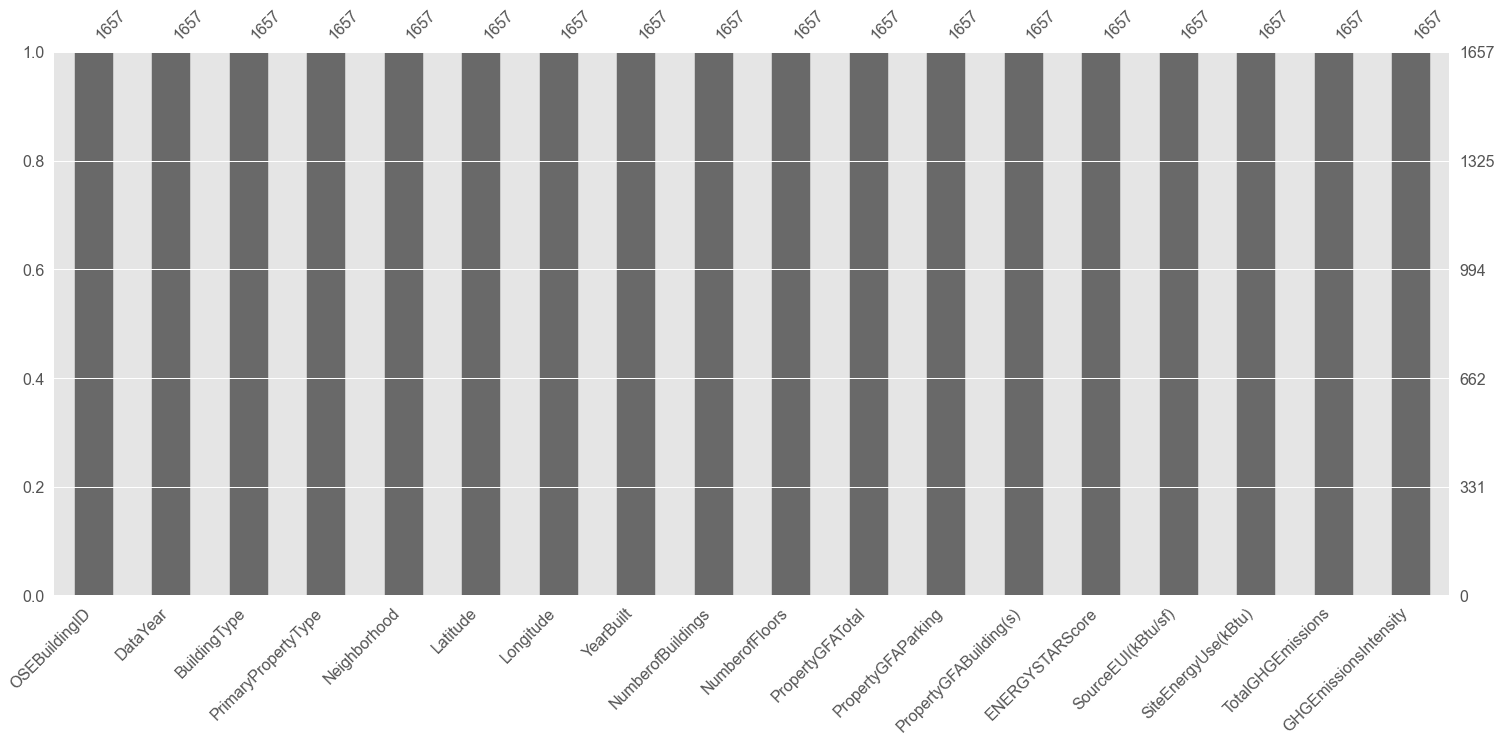

In [109]:
msno.bar(df)

# 4.Analyse exploratoire <a class="anchor" id="ae"></a>

### Analyse univariée

In [110]:
font_title = {'family': 'serif',
             'color':  '#114b98',
             'weight': 'bold',
            'size': 18,
            }

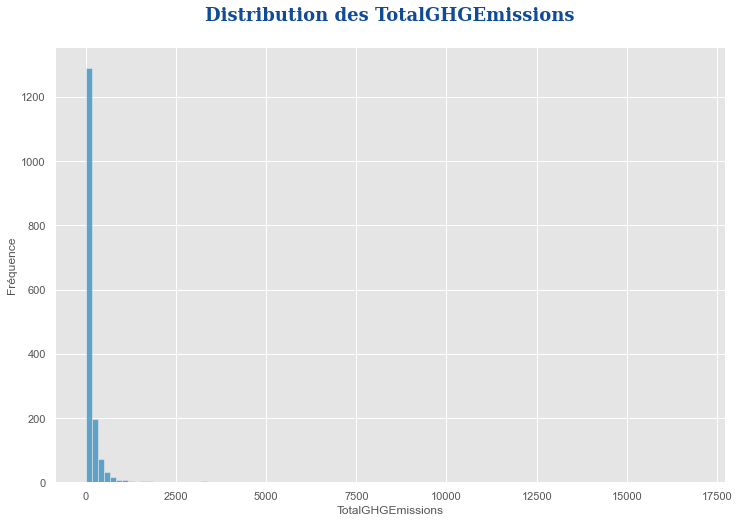

In [111]:
#Distribution de 'TotalGHGEmissions'
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='TotalGHGEmissions', bins=100)

ax.set_xlabel("TotalGHGEmissions")
ax.set_ylabel("Fréquence")
plt.title(f"Distribution des TotalGHGEmissions\n", fontdict=font_title)
plt.show()

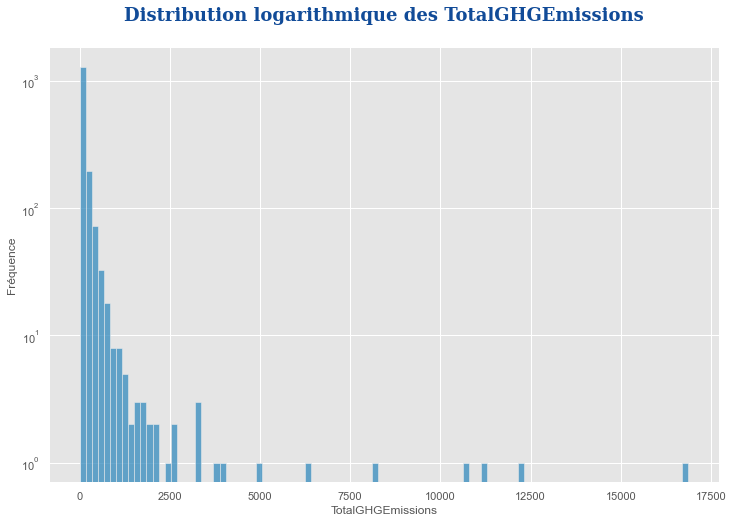

In [112]:
#Distribution logarithmique de 'TotalGHGEmissions'
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='TotalGHGEmissions', bins=100)
ax.set_yscale('log')
ax.set_xlabel("TotalGHGEmissions")
ax.set_ylabel("Fréquence")
plt.title(f"Distribution logarithmique des TotalGHGEmissions\n", fontdict=font_title)
plt.show()

**Observation**
<br>
la cible 'TotalGHGEmissions' ne suit pas la loi normale.

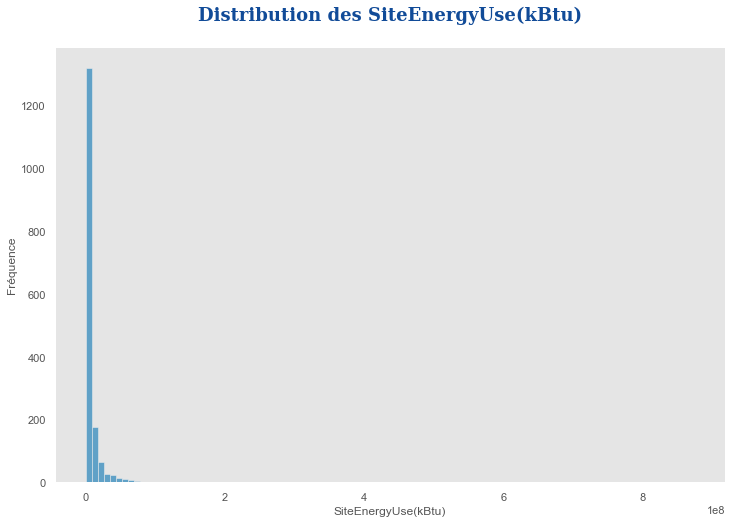

In [113]:
#Distribution de 'SiteEnergyUse(kBtu)'
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='SiteEnergyUse(kBtu)', bins=100)

ax.set_xlabel("SiteEnergyUse(kBtu)")
ax.set_ylabel("Fréquence")
plt.title(f"Distribution des SiteEnergyUse(kBtu)\n", fontdict=font_title)
plt.grid()
plt.show()

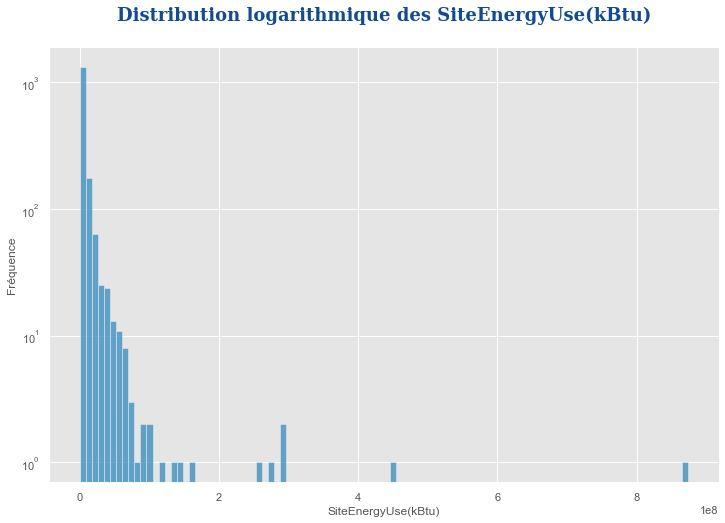

In [114]:
#Distribution logarithmique de 'SiteEnergyUse(kBtu)'
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='SiteEnergyUse(kBtu)',bins=100)
ax.set_yscale('log')
ax.set_xlabel("SiteEnergyUse(kBtu)")
ax.set_ylabel("Fréquence")
plt.title(f"Distribution logarithmique des SiteEnergyUse(kBtu)\n", fontdict=font_title)
plt.show()

**Observation**
<br>
la cible 'SiteEnergyUse(kBtu)' ne suit pas la loi normale.

In [115]:
DataYear=df['DataYear']

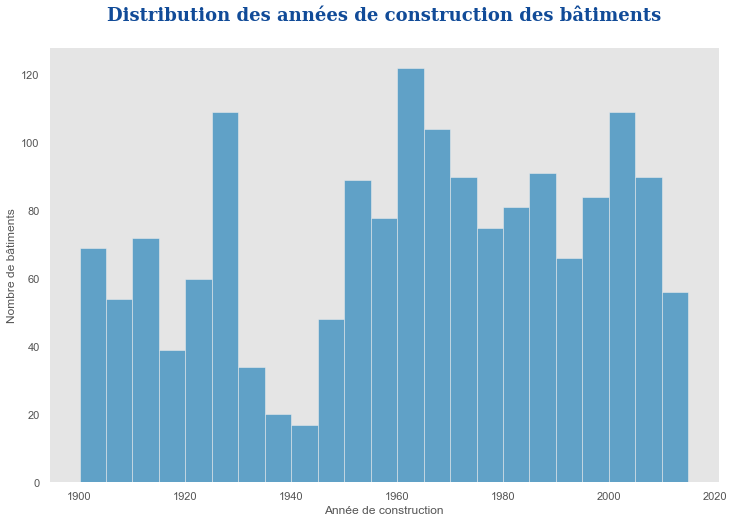

In [116]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='YearBuilt', bins=int((df.YearBuilt.max() - df.YearBuilt.min())/5))
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution des années de construction des bâtiments\n", fontdict=font_title)
plt.grid()
plt.show()

**Observations**
<br>
La plupart des batiments sont construits après 1950

In [117]:
##### ajouter une colonne tranche_date selon la variale YearBuilt
df['tranche_date'] = None
df.tranche_date[df.YearBuilt < 1950] = 'tranche_date1'
df.tranche_date[(df.YearBuilt >= 1950) & (df.YearBuilt<1980)] = 'tranche_date2'
df.tranche_date[(df.YearBuilt >= 1980) & (df.YearBuilt<2000)] = 'tranche_date3'
df.tranche_date[df.YearBuilt >= 2000] = 'tranche_date4'

In [118]:
df['tranche_date'] .unique()

array(['tranche_date1', 'tranche_date3', 'tranche_date2', 'tranche_date4'],
      dtype=object)

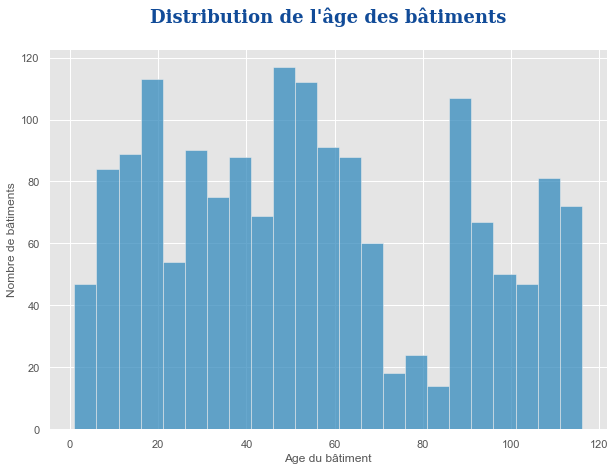

In [119]:
#Ajout de la variable age 
df['BuildingAge'] = DataYear - df['YearBuilt']
# df.drop('YearBuilt', axis=1, inplace=True)

fig = plt.figure(figsize=(10,7))
ax = sns.histplot(data=df, x='BuildingAge', bins=int((df.BuildingAge.max() - df.BuildingAge.min())/5))
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution de l'âge des bâtiments\n", fontdict=font_title)
plt.show()

In [120]:
df.shape

(1657, 20)

**Observations**
<br>
La plupart des batimentssont agés moins de 70 ans.

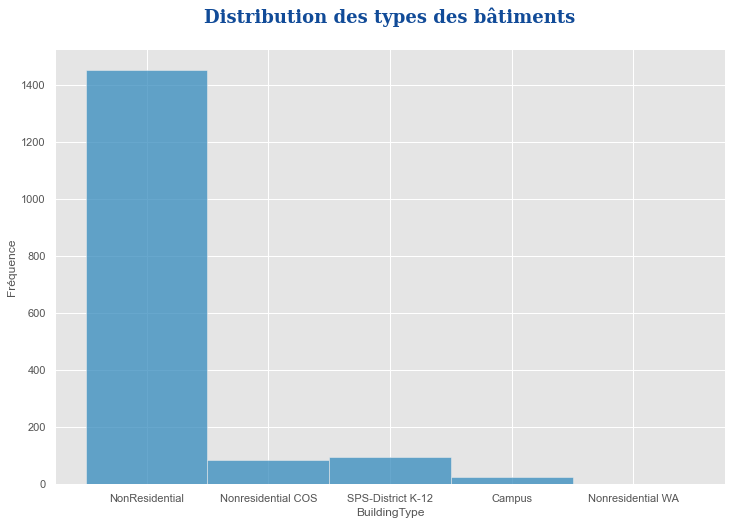

In [121]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='BuildingType')
ax.set_xlabel("BuildingType")
ax.set_ylabel("Fréquence")
plt.title(f"Distribution des types des bâtiments\n", fontdict=font_title)
plt.show()

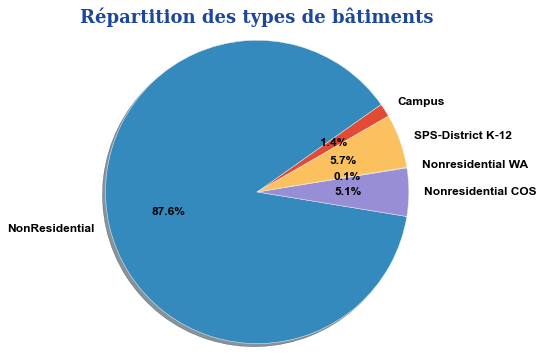

In [122]:
building_type = df.groupby(by='BuildingType')['OSEBuildingID'].nunique()
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(building_type.values, labels=building_type.index, 
       autopct='%1.1f%%', shadow=True, startangle=30,
       textprops=dict(color="black",size=12, weight="bold"))
ax.axis('equal')
ax.set_title("Répartition des types de bâtiments", fontdict=font_title)
plt.show()

**Note**
<br>
La plupart des types sont non residential
<br>
par contre nonresidential wa represente la plus petite tranche.Regardons ça de près

In [123]:
df[df['BuildingType']=="Nonresidential WA"].shape

(1, 20)

**Note**
<br>il ya une seule ligne avec "Nonresidential WA" donc on va la supprimer 

In [124]:
index_to_drop=df[df['BuildingType']=="Nonresidential WA"].index
df.drop(index_to_drop, inplace=True)
df.shape

(1656, 20)

In [125]:
df.loc[(df['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    285
Other                          182
Warehouse                      180
Large Office                   168
Mixed Use Property             101
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             51
Supermarket / Grocery Store     39
K-12 School                     39
Medical Office                  38
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      17
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             2
Name: PrimaryPropertyType, dtype: int64

**Observation**
<br>
 La plus grande part des bâtiments non résidentiels sont des bureaux de petite et moyenne taille 

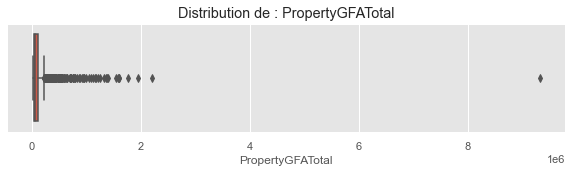

In [126]:
plt.figure(figsize = (10,2))
    
sns.boxplot(x=df['PropertyGFATotal'])
chaine = 'Distribution de : ' + 'PropertyGFATotal'
plt.title(chaine)
plt.xlabel('PropertyGFATotal')
plt.show()
sns.set(font_scale=1)

**Observation**
<br> il ya des outliers apres 9.e6 ==> supprimer les lignes correspondantes

In [127]:
df[df['PropertyGFATotal']>9000000]

OSEBuildingID  DataYear BuildingType PrimaryPropertyType Neighborhood  \
3274          49967      2016       Campus          University    NORTHEAST   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
3274  47.65644 -122.31041       1900              111.0               1   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
3274           9320156                   0                 9320156   

      ENERGYSTARScore  SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  \
3274              0.0          246.600006          873923712.0   

      TotalGHGEmissions  GHGEmissionsIntensity   tranche_date  BuildingAge  
3274           11140.56                    1.2  tranche_date1          116

**Observation**
<br>
Quelques valeurs sont beaucoup trop éloignées des autres et risquent de nous gêner dans l'analyse; nous allons les éliminer :

In [128]:
index_to_drop=df[df['PropertyGFATotal']>9000000].index
df.drop(index_to_drop, inplace=True)
df.shape

(1655, 20)

In [129]:
var_to_boxplot=['PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)']

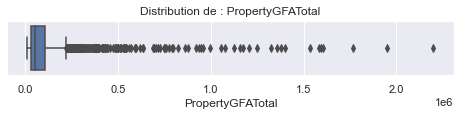

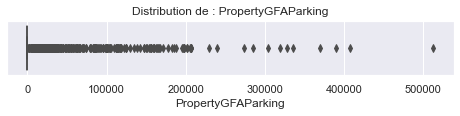

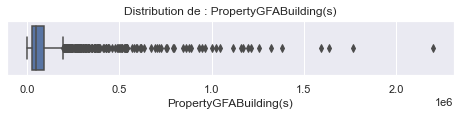

In [130]:
for column in var_to_boxplot:
    plt.figure(figsize = (8,1))
    
    sns.boxplot(x=df[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

In [131]:
df[var_to_boxplot].describe()

PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)
count      1.655000e+03         1655.000000            1.655000e+03
mean       1.129375e+05        12999.292447            9.993822e+04
std        1.920208e+05        42424.791066            1.703199e+05
min        1.128500e+04            0.000000            3.636000e+03
25%        2.940850e+04            0.000000            2.841100e+04
50%        4.924900e+04            0.000000            4.723700e+04
75%        1.055500e+05            0.000000            9.480650e+04
max        2.200000e+06       512608.000000            2.200000e+06

**Observation**
<br>
LA variable 'PropertyGFATotal' suit pratiquement la meme distribution de 'PropertyGFABuilding(s)'.du coup on garde l'une de ces variables seulement et on supprime également la variable  'PropertyGFAParking',
       ]

In [132]:
df = df.drop(['PropertyGFABuilding(s)','PropertyGFAParking'], axis=1)
df.shape

(1655, 18)

In [133]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'ENERGYSTARScore', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'tranche_date',
       'BuildingAge'],
      dtype='object')

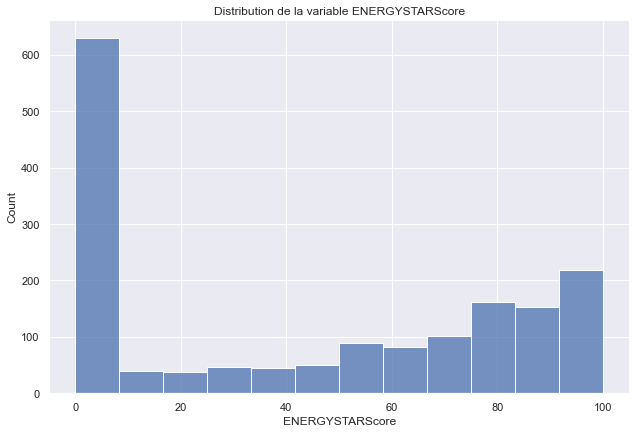

In [134]:
anaghg=sns.displot(df['ENERGYSTARScore'], palette='bright', height=6, aspect=1.5)

anaghg.set(title="Distribution de la variable ENERGYSTARScore")

**Observation**
<br>
LA plupart des patiments ont un score >50

In [135]:
df.groupby(by='BuildingType')['ENERGYSTARScore'].mean()

BuildingType
Campus                12.304348
NonResidential        43.672176
Nonresidential COS     7.882353
SPS-District K-12     73.747368
Name: ENERGYSTARScore, dtype: float64

**Observation**
<br>
Les batiments de type SPS-District K-12 ont les meillers score >85%


In [136]:
df.shape

(1655, 18)

#### Regroupement des classes

In [137]:
cat_cols = [col for col in df.columns if df[col].dtype=="O"]
cat_cols

['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'tranche_date']

In [138]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus'], dtype=object)

In [139]:
df['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE',
       'Ballard', 'North', 'Delridge', 'Northwest', 'Central',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [140]:
df['groups_neighborhood'] = None
df.groups_neighborhood[df['Neighborhood']. isin(['NORTH', 'North', 'NORTHEAST', 'NORTHWEST', 'Northwest'])] = 'North'
df.groups_neighborhood[df['Neighborhood']. isin(['SOUTHEAST', 'SOUTHWEST'])] = 'South'
df.groups_neighborhood[df['Neighborhood']. isin(['CENTRAL', 'Central'])] = 'Central'
df.groups_neighborhood[df['Neighborhood']. isin( ['DELRIDGE', 'Delridge', 'DELRIDGE NEIGHBORHOODS', 'BALLARD', 'Ballard', 'DOWNTOWN', 'EAST', 
                                          'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',])] = 'Various'

In [141]:
df['groups_neighborhood'].unique()

array(['Various', 'South', 'North', 'Central'], dtype=object)

In [142]:
df['groups_PrimaryPropertyType'] = None
df.groups_PrimaryPropertyType[df['PrimaryPropertyType']. isin(['Hospital','Laboratory','Medical Office','Senior Care Community'])] = 'Health'
df.groups_PrimaryPropertyType[df['PrimaryPropertyType']. isin(['Retail Store','Supermarket / Grocery Store', 'Distribution Center','Restaurant',  'Refrigerated Warehouse','Warehouse','Self-Storage Facility'])] = 'Commerce'
df.groups_PrimaryPropertyType[df['PrimaryPropertyType']. isin( ['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property','Worship Facility','Residence Hall',
                 'Small- and Mid-Sized Office','Large Office','Low-Rise Multifamily','High-Rise Multifamily','Office',
                   'University', 'K-12 School'])] = 'Various'

In [143]:
df['groups_PrimaryPropertyType'].unique()


array(['Various', 'Commerce', 'Health'], dtype=object)

### Analyse bivariée

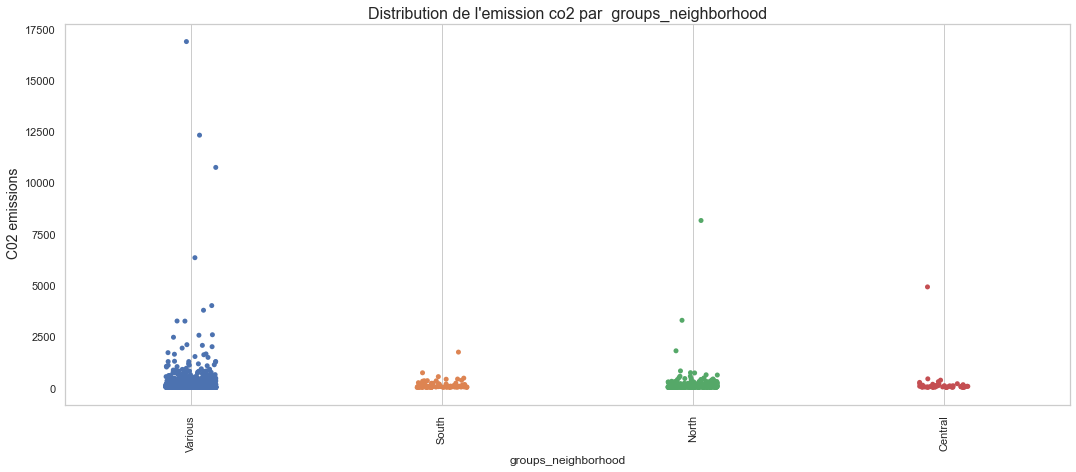

In [144]:

fig=plt.figure(figsize=[18,7])
#fig.patch.set_facecolor('#E0E0E0')
#fig.patch.set_alpha(0.7)
sns.set_style('whitegrid')
plt.title("Distribution de l'emission co2 par  {}".format('groups_neighborhood'),size=16)
#sns.boxplot(x='groups_neighborhood', y="TotalGHGEmissions", data=df,color="#cbd1db")

ax = sns.stripplot(x='groups_neighborhood', y="TotalGHGEmissions",data=df)

plt.ylabel(" C02 emissions",size=14)
plt.xticks(range(0,len(df['groups_neighborhood'].unique()))
               ,df['groups_neighborhood'].unique(),rotation=90)

plt.grid()
plt.show()

In [145]:
df[df["TotalGHGEmissions"]>2500].shape

(13, 20)

**Observation** 
<br>
il ya que 14 ligne dont la consommation de co2est >2500 (ce qui represente 0.84% des donnés).
<br>
A supprimer??????

### Analyse multivariée

**Observation**

In [146]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'ENERGYSTARScore', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'tranche_date',
       'BuildingAge', 'groups_neighborhood', 'groups_PrimaryPropertyType'],
      dtype='object')

In [147]:
numercial_cols = [col for col in df.columns if df[col].dtype!="O"]
numercial_cols

['OSEBuildingID',
 'DataYear',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'ENERGYSTARScore',
 'SourceEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'BuildingAge']

In [148]:
target2

'SiteEnergyUse(kBtu)'

In [149]:
df['BuildingAge'].unique()

array([ 89,  20,  47,  90,  36,  17, 112,  18,  88,  94,  12,  86,  33,
       109, 100,  31,  55,  15,  25,  38,  67,  27, 110,  22,  61,  24,
        26,  66, 116,  62, 105,  43,  96, 106,  34, 108,  57,  16,  19,
        54,  46,   8,  68,  51,  87,   6,  78,  30,  14,  93,  13,  59,
        52,  75,  53,  10, 101,  58,   7,   5,  45,   9,  65,  63,  64,
        56,  79,  50,  48,  91,  92,  11,  85,  44, 102, 103,  21,  35,
        40, 107,  28,  37,  69,  32,  60, 104,  39,  95,  71,  42,  41,
        70,  49,  29,  76,  84,  23,  98, 111, 114,  77,  72,  99,  74,
       113,   4,   3,  97, 115,  80,  81,   2,   1], dtype=int64)

In [150]:
var_to_scatter_target1=['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'ENERGYSTARScore',
 'SourceEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
  'GHGEmissionsIntensity',
 'BuildingAge']

In [151]:
var_to_scatter_target2=[ 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'ENERGYSTARScore',
 'SourceEUI(kBtu/sf)', 
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'BuildingAge']

In [152]:
cat_cols = [col for col in df.columns if df[col].dtype=="O"]
cat_cols
cat_cols_scatter=['BuildingType',
  
 'tranche_date',
 'groups_PrimaryPropertyType',
 'groups_neighborhood']

In [153]:
   def plot_scatter(hu,x1,y1):
        plt.figure(figsize = (5,3))
        
        g=sns.scatterplot(x=x1, y=y1, hue=hu,
              data=df, 
                     legend='full')
        g.set(xscale="log")
   
        plt.show()
        

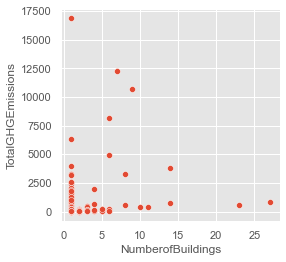

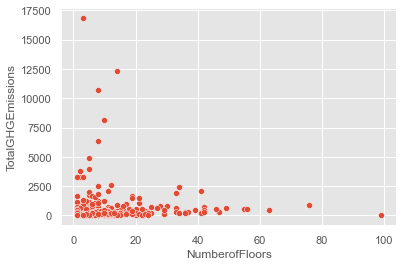

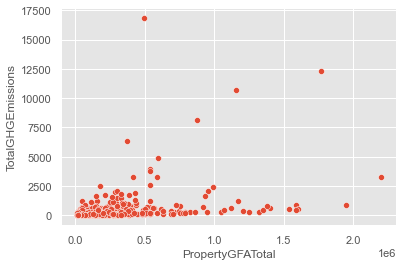

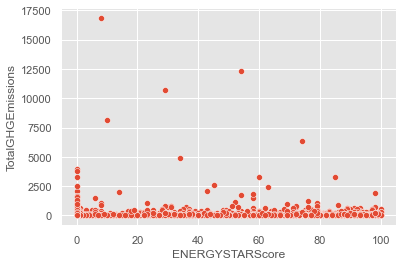

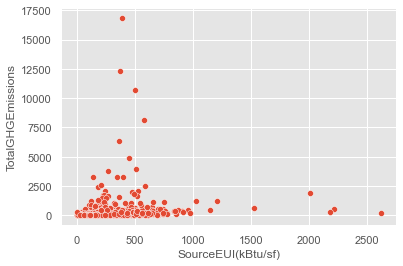

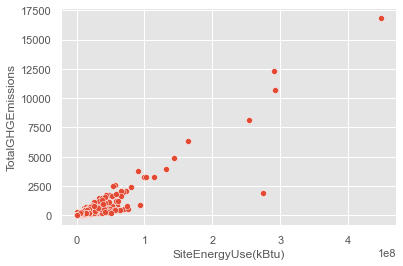

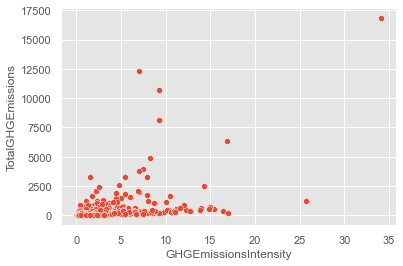

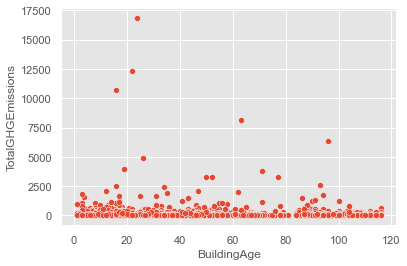

In [154]:
# Generate scatter plot of independent vs Dependent variable
plt.style.use('ggplot')
fig = plt.figure(figsize = (18, 18))
index=0
for index,var in enumerate(var_to_scatter_target1):
    
    ax = fig.add_subplot(4, 4, index + 1)
    sns.scatterplot(x=var, y=target1,data=df)
    ax.set_ylabel('TotalGHGEmissions', size = 12)
    ax.set_xlabel(var, size = 12)
    plt.show()

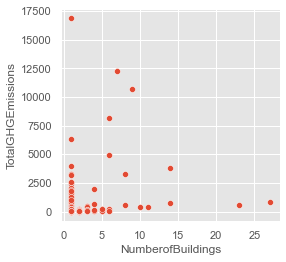

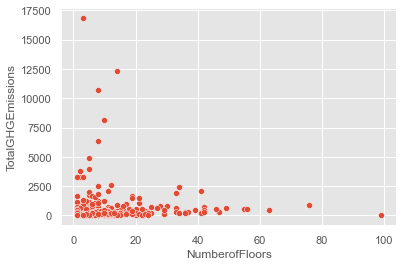

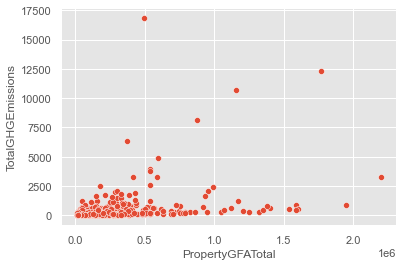

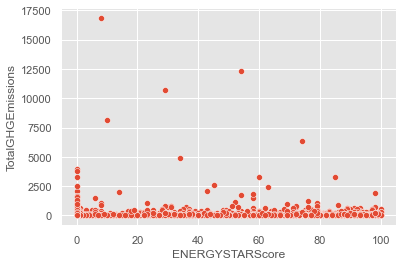

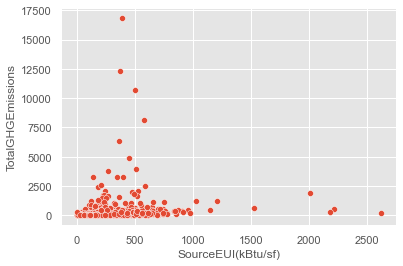

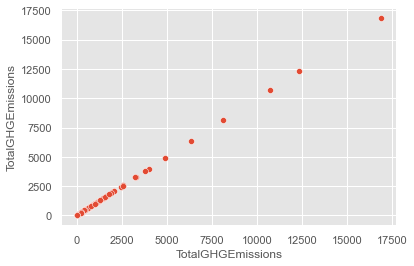

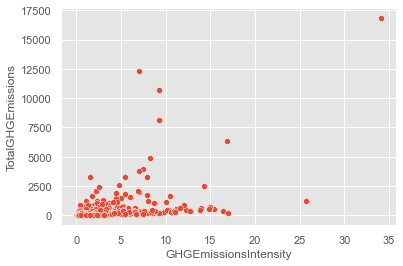

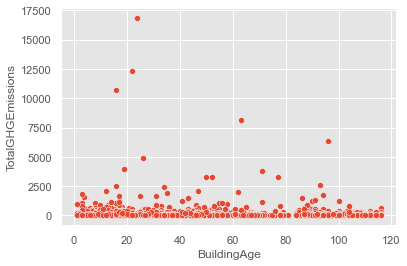

In [157]:
# Generate scatter plot of independent vs Dependent variable
plt.style.use('ggplot')
fig = plt.figure(figsize = (18, 18))
index=0
for index,var in enumerate(var_to_scatter_target2):
    
    ax = fig.add_subplot(4, 4, index + 1)
    sns.scatterplot(x=var, y=target1,data=df)
    ax.set_ylabel('TotalGHGEmissions', size = 12)
    ax.set_xlabel(var, size = 12)
    plt.show()

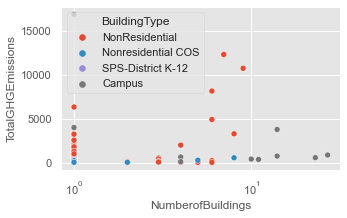

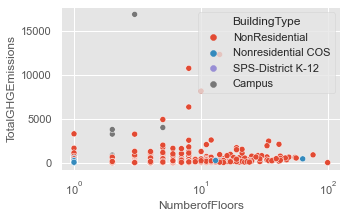

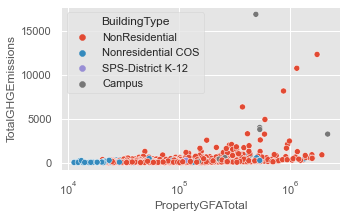

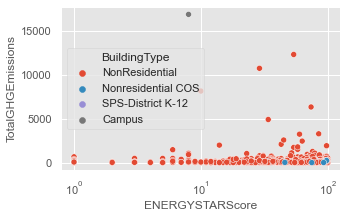

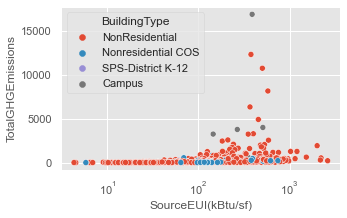

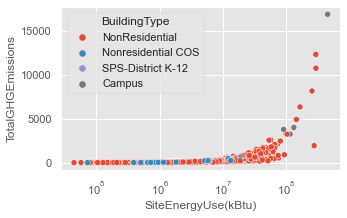

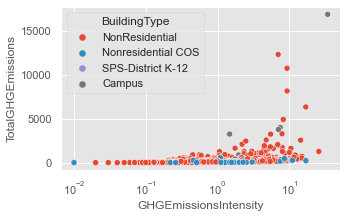

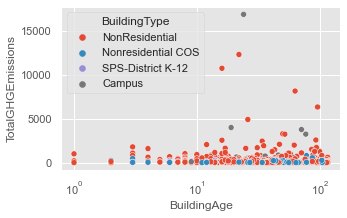

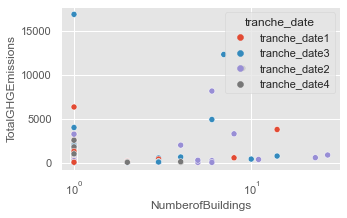

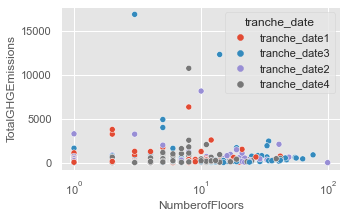

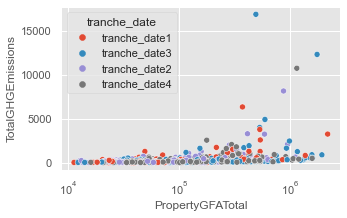

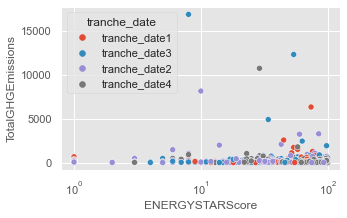

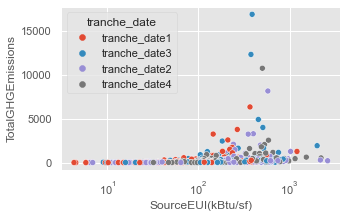

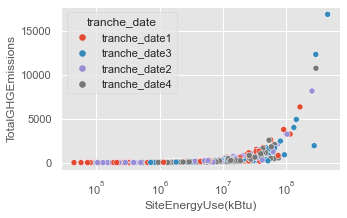

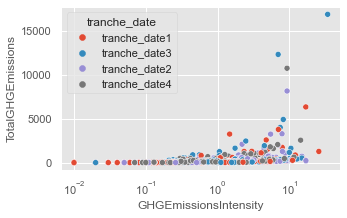

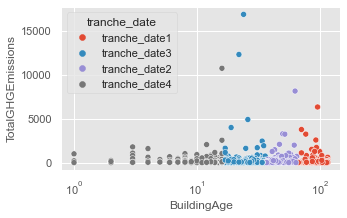

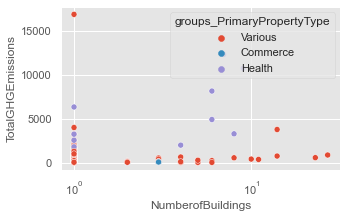

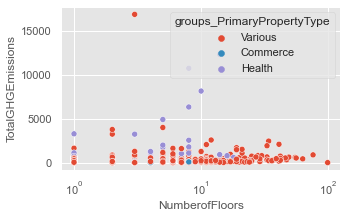

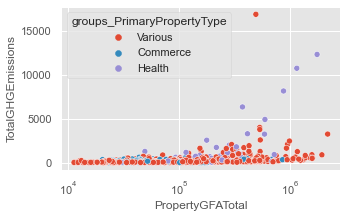

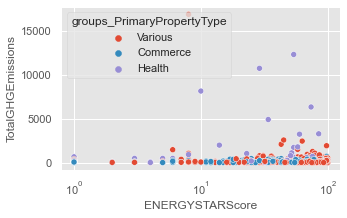

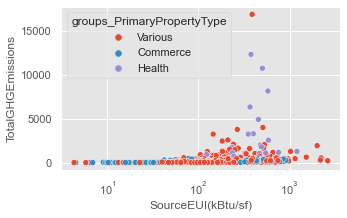

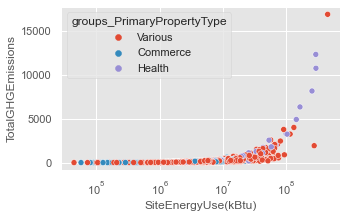

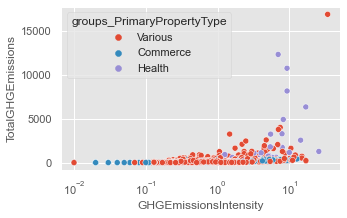

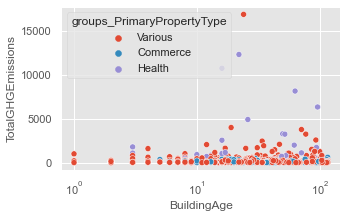

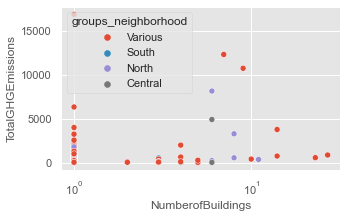

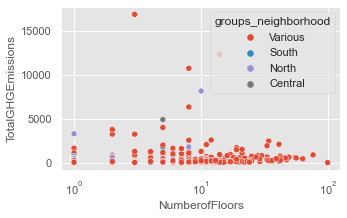

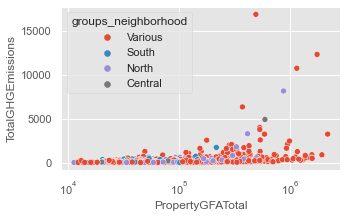

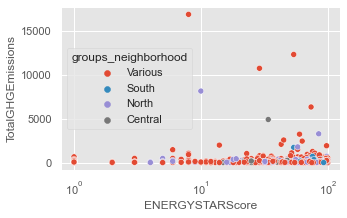

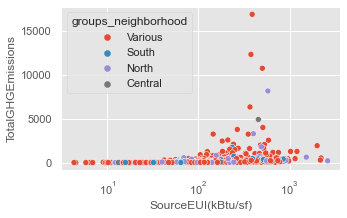

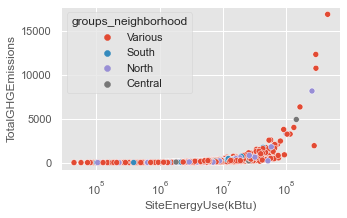

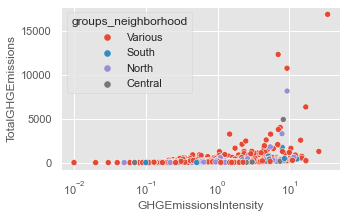

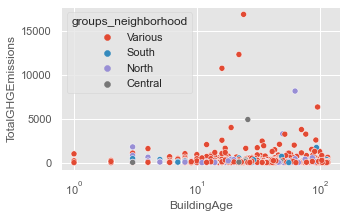

In [158]:
#target1
for h in cat_cols_scatter:
    for column in var_to_scatter_target1:
        plot_scatter(h,column,target1)
  

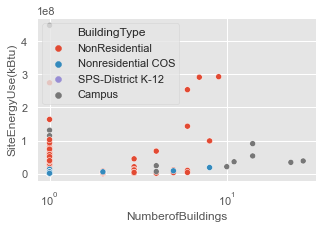

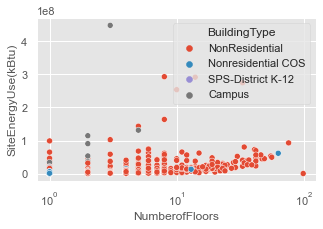

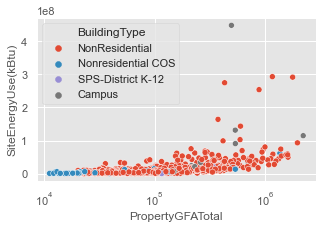

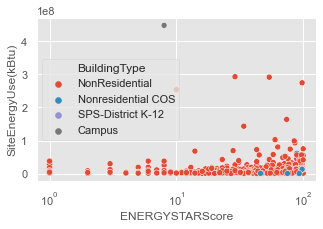

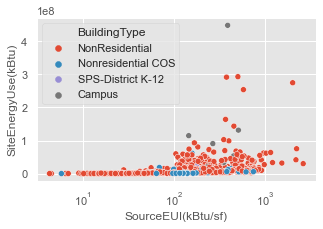

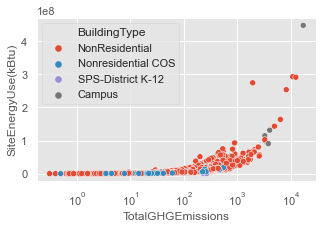

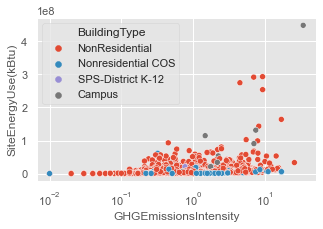

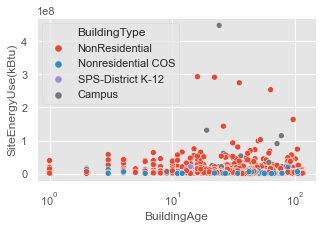

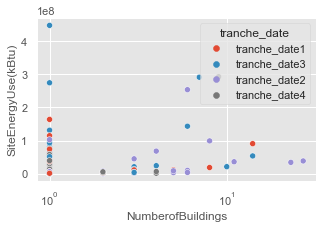

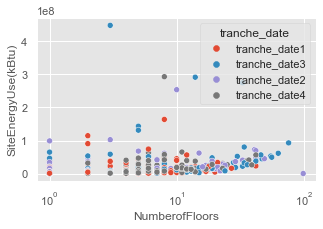

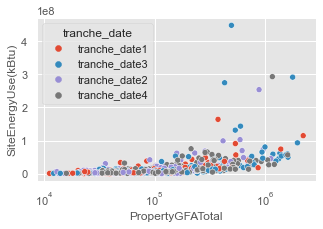

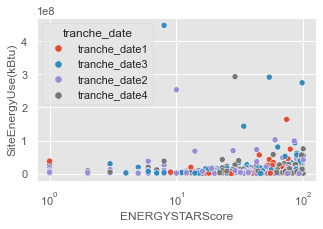

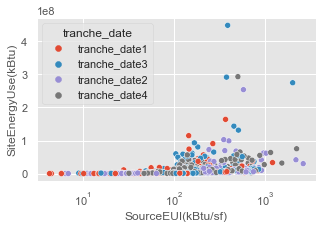

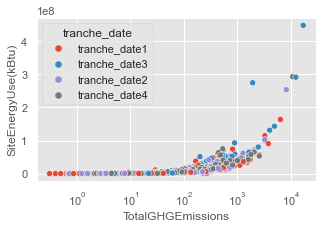

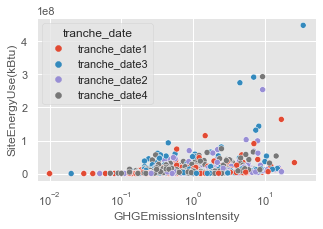

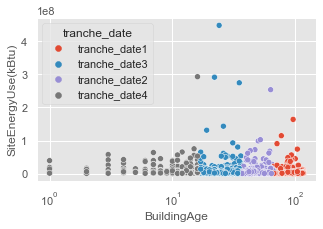

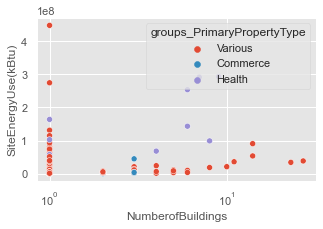

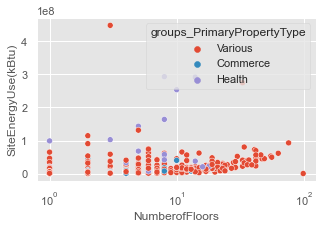

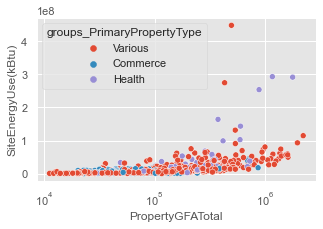

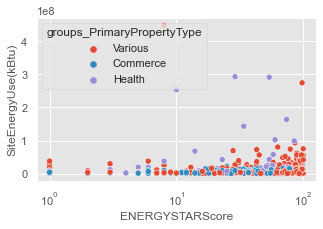

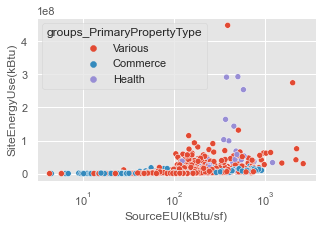

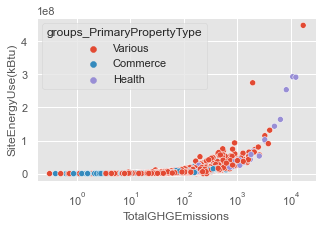

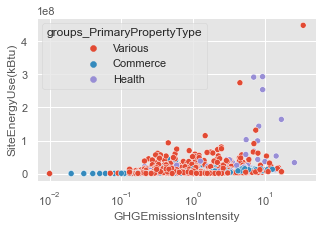

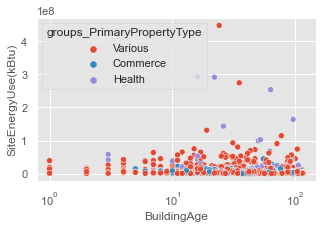

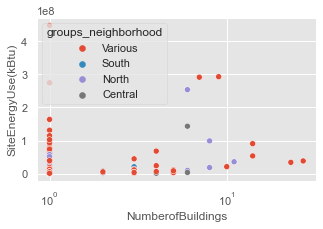

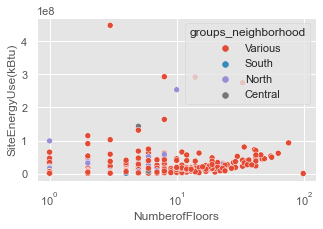

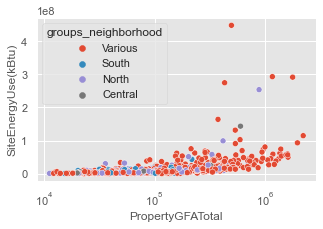

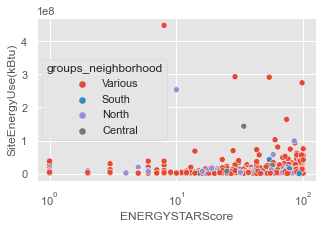

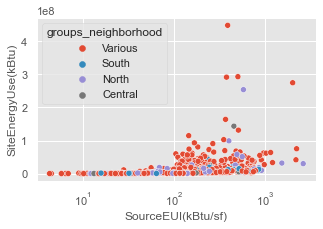

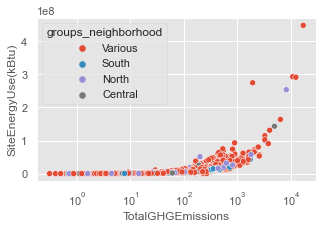

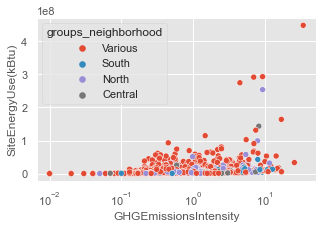

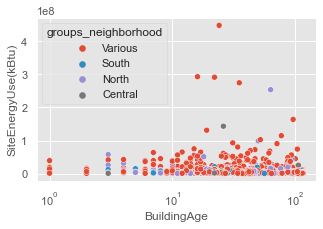

In [159]:
#target1
for h in cat_cols_scatter:
    for column in var_to_scatter_target2:
        plot_scatter(h,column,target2)
  

**Observations**
<br>
Que les deux cibles sont colinéaires

In [ ]:
#df[['BuildingType','NumberofBuildings']]


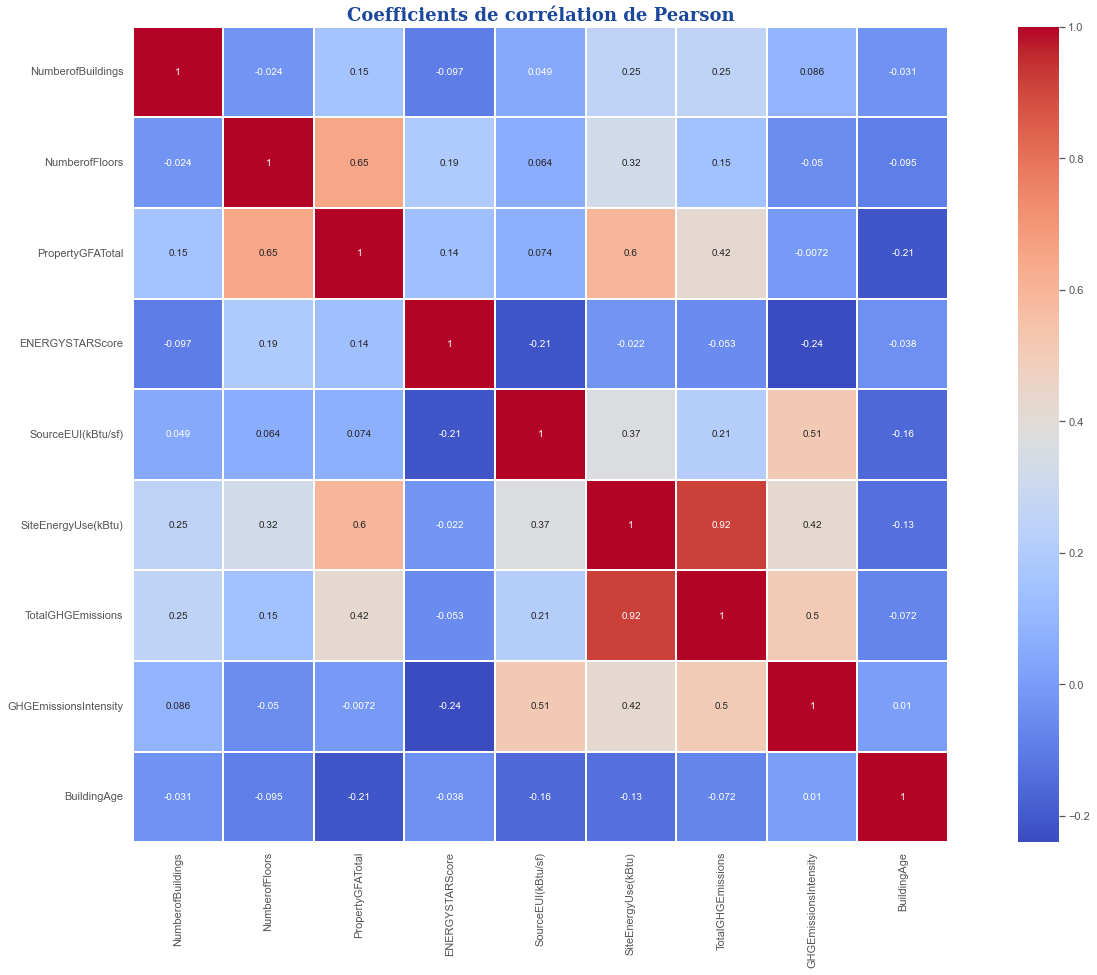

In [160]:
#look for correlated variables
fig=plt.figure(figsize=(25,15))


corr_mat = df[[
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'ENERGYSTARScore',
 'SourceEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'BuildingAge']].corr()
sns.heatmap(corr_mat, square=True, linewidths=0.01, annot=True, cmap='coolwarm')
plt.title("Coefficients de corrélation de Pearson", fontdict=font_title)
plt.show()

In [161]:
threshold_up = 0.7
corr_pairs = corr_mat.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold_up)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & 
                          (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

level_0            level_1  corr_coeff
0  SiteEnergyUse(kBtu)  TotalGHGEmissions    0.915542

In [ ]:
target2

In [ ]:
df.shape

In [162]:
df=df[['OSEBuildingID',  'BuildingType',       
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'ENERGYSTARScore', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'tranche_date',
       'BuildingAge', 'groups_neighborhood', 'groups_PrimaryPropertyType']]

In [ ]:
df.columns

# 5.Sauvegarde des données dans un fichier csv<a class="anchor" id="cs"></a>

In [163]:
#sauvegarde des données cleanées
df.to_csv('prepared_data.csv', sep='\t',index=False)
#df.set_index("OSEBuildingID").to_csv('prepared_data.csv', sep='\t')